<a href="https://colab.research.google.com/github/subhasiz/python/blob/master/EXP_5_Binomial_and_Gaussian_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Distribution

A probability distribution is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment.

In this experiment, we will explore two probability distributions -
*   Binomial distribution
*   Gaussian (normal) distribution

---

#Binomial distribution

The binomial distribution is used when there are exactly two mutually exclusive outcomes of a trial. These outcomes are appropriately labeled "success" and "failure".

*The binomial distribution is used to obtain the probability of observing $x$ successes in $N$ trials, with the probability of success on a single trial denoted by $p$. The binomial distribution assumes that $p$ is fixed for all trials.*

---

###Let us understand this with an example

Consider the experiment of ```flipping a fair coin 3 times```. Let the event of ```flipping a head``` be considered a ```success```, and let the event of ```flipping a tail``` be considered a ```failure```.

Since, we are dealing with a fair coin, the probability of both ```flipping a head``` and ```flipping a tail``` are equal, i.e. 50 percent. Therefore, probability of success is $p=0.5$, and probability of failure is $q=1-p=0.5$.

Since we are going to run the trial $3$ times (```flip the coin three times```) in our experiment, we have $N=3$.

####**What is the probability of having exactly 2 heads in 3 tosses of a fair coin?**

Let us answer this by looking at all the possible outcomes -

| Sl\. No\. | Event | Probability \(Formula\) | Probability \(Value\) |
|:-----------:|:-------:|:-----------:|:---------:|
| 1         | TTT   | $q{\times}q{\times}q = q^{3}$    | $0.125$              |
| 2         | TTH   | $q{\times}q{\times}p = pq^{2}$ | $0.125$              |
| 3         | THT   | $q{\times}p{\times}q = pq^{2}$ | $0.125$              |
| 4         | THH   | $q{\times}p{\times}p = p^{2}q$ | $0.125$              |
| 5         | HTT   | $p{\times}q{\times}q = pq^{2}$ | $0.125$              |
| 6         | HTH   | $p{\times}q{\times}p = p^{2}q$ | $0.125$              |
| 7         | HHT   | $p{\times}p{\times}q = p^{2}q$  | $0.125$              |
| 8         | HHH   | $p{\times}p{\times}p = p^{3}$  | $0.125$              |


We can see that there are $3$ outcomes with ```exactly 2 heads in 3 coin tosses``` (i.e #$4$, #$6$, and #$7$), with each having probability $p^{2}q\;(=0.125)$. So, the ```total probability``` of having ```exactly 2 heads in 3 coin tosses``` will be the sum of the probability of the $3$ outcomes.

$P($ ```exactly 2 heads in 3 tosses of a fair coin```$)\;= 3 \times p^{2}q = 3 \times 0.5^{2} \times 0.5 = 0.375$

---
####**What if we are dealing with a biased coin where the probability of head (success) is 60%?**

Here the probability of success is $p=0.6$, and probability of failure is $q=1-p=0.4$. By changing the value of $p$ and $q$ in the above example, we can see that -

$P($ ```exactly 2 heads in 3 tosses of a biased coin```$)\;= 3 \times p^{2}q = 3 \times 0.6^{2} \times 0.4 = 0.432$

This makes sense - since our coin is biased in favour of landing heads, the probability that we will see ```2 heads in 3 coin tosses``` increases with a biased coin compared with that of a fair coin.

---
###The two parts of the equation -

We can see that there are two parts in our equation ($3 \times p^{2}q$) -


*   The (Binomial) coefficient - $3$
*   The polynomial - $p^{2}q$

Let us understand both of them.

---
####The coefficient -

**Where did the coefficient $3$ come from?**

It is the number of possible arrangements of $2$ heads (and, therefore, $1$ tail) without making any distinction in the order in which the heads appear. We make no distinction between the first head and the second head - we simply care that there are two heads. Thus, the problem reduced down to calculating $^{3}C_{2}=3$.

In general, the number of ways in which we can have $x$ successes in $N$ trials is given by -$$^{N}C_{x} = \frac{N!}{x!{\times}{(N-x)!}}$$.

Clearly we need to find factorials to calculate $^{N}C_{x}$.

Write the function below to find factorial of the given parameter -

In [ ]:
def factorial(a):
  '''
  Return the factorial of input parameter - a.
  Check that 'a' is nonnegative and is an integer.
  If possible, avoid recursion.
  Handle the case when a=0.
  '''
  if a < 0:
    return('error')
  elif a==0:
    return 1
  fact = 1
  for i in range(1,a+1):
    fact*=i
  return fact

Use the  ```factorial``` function defined above to find  $^{N}C_{x}$ in the function below -

In [ ]:
def combination(N,x):
  '''
  Return N choose x
  Use the factorial function previously defined.
  '''
  nCx = factorial(N)/(factorial(x)*factorial(N-x))
  return nCx

---
####The polynomial -

The polynomial gives the probability of one single outcome of our interest ($x$ successes in $N$ trials). There are a total of $^N{C}_x$ such events.

We were interested in $2$ ```successes/heads``` (and hence, $1$ ```failure/tail```) out of $3$ trials. The probability of one such outcome is given by the polynomial $p^{2}q$.

In general, if we are interested in ```x successes in N trials```, where the probability of ```success``` in a single trial is $p$ and probability of failure is $q=1-p$, then the probability of a single outcome of our interest (i.e. ```x successes in N trials```) is $p^{x}q^{N-x}$.

Implement the following function to calculate the probability of a single outcome -

In [ ]:
def single_outcome_probability(N,x,p):
  '''
  Input -
    N: Number of trials
    x: Number of successes
    p: Probability of single event
  '''
  q = 1-p
  probability = (p**x)*(q**(N-x))
  return probability

---
Now we are ready to calculate the total probability of $x$ successes in $N$ trials, given x, N and p, as defined above.

$P($ ```x success in N trials```$)\;=\;^N{C}_{x} \times p^{x}q^{N-x}$.

Use the ```combination``` and ```single_outcome_probability``` functions defined above to find the total probability -

In [ ]:
def probability(N,x,p):
  total_probability = combination(N,x)*single_outcome_probability(N,x,p)
  return total_probability

---
####**Consider rolling a fair dice in the game of Ludo.**

Let us suppose that rolling $6$ is ```success```, while rolling anything else is ```failure```.

The probability of ```success``` is $p = \frac{1}{6} = 0.167$, and the probability of ```failure``` is $q = \frac{5}{6} = 0.833$.

Suppose that we roll the dice $10$ times, and we want to know the probabilities of rolling various numbers of $6$s.

Binomial distribution can provide us the answer.

In [ ]:
N = 10
p = 0.167
def binomial(N,p):
  probabilities = []
  for x in range(N+1):
    probabilities.append(probability(N,x,p))
  return probabilities

binomial_dist = binomial(N,p)

Let us plot the distribution -

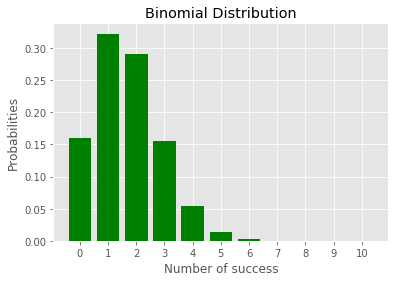

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
x = range(10+1)

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, binomial_dist, color='green')
plt.xlabel("Number of success")
plt.ylabel("Probabilities")
plt.title("Binomial Distribution")

plt.xticks(x_pos, x)

plt.show()

We can see that the distribution is ```skewed``` towards the left. This makes sense because the probability of success in a single event is very low.

---

**What if we consider rolling an even number in a dice to be success?**

Then, the probability of ```success``` and ```failure``` will both be $p=q=0.5$.

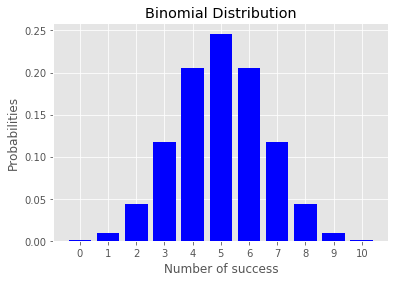

In [ ]:
p = 0.5

binomial_dist = binomial(N,p)

plt.bar(x_pos, binomial_dist, color='blue')
plt.xlabel("Number of success")
plt.ylabel("Probabilities")
plt.title("Binomial Distribution")

plt.xticks(x_pos, x)

plt.show()

We can see that the distribution is symmetric now that we have equal probabilities of ```success``` and ```failure```.

We will talk more about the skewness of distribution in our next experiment.

---
Let us now look at another probability distribution that is ubiquitous in statistics and data science.

# Gaussian Distribution

The following array gives the marks scored by students in a test ([Kaggle Dataset Source](https://www.kaggle.com/spscientist/students-performance-in-exams)).

In [ ]:
marks = [72,90,95,57,78,83,95,43,64,60,54,52,81,72,53,75,89,32,42,58,69,75,54,73,71,74,54,69,70,70,74,65,72,42,87,81,81,64,90,56,61,73,58,\
         65,56,54,65,71,74,84,55,69,44,78,84,41,85,55,59,17,74,39,61,80,58,64,37,72,58,64,63,55,51,57,49,41,26,78,74,68,49,45,47,64,39,80,\
         83,71,70,86,72,34,79,45,86,81,66,72,67,67,67,74,91,44,86,67,100,63,76,64,89,55,53,58,100,77,85,82,63,69,92,89,93,57,80,95,68,77,82,\
         49,84,37,74,81,79,55,54,55,66,61,72,62,55,43,73,39,84,68,75,100,67,67,70,49,67,89,74,60,86,62,78,88,53,53,92,100,51,76,83,75,73,88,\
         86,67,51,91,54,77,70,100,68,64,50,69,52,67,76,66,52,88,65,83,64,62,84,55,69,56,53,79,84,81,77,69,41,71,62,80,81,61,79,28,62,51,91,\
         83,86,42,77,56,68,85,65,80,66,56,72,50,72,95,64,43,86,87,82,75,66,60,52,80,68,83,52,51,74,76,76,70,64,60,49,83,70,80,52,73,73,77,\
         75,81,79,79,50,93,73,42,75,72,92,76,63,49,53,70,85,78,92,63,86,56,52,48,79,78,46,82,82,89,75,76,70,73,60,73,77,62,41,74,46,87,78,\
         54,84,76,75,67,87,52,71,57,76,60,61,67,64,66,82,72,71,65,79,86,81,53,46,90,61,23,75,55,60,37,56,78,93,68,70,51,38,55,61,73,76,72,73,\
         80,61,94,74,74,65,57,78,58,71,72,61,66,62,90,62,84,58,34,60,58,58,66,64,84,77,73,74,97,70,43,90,95,83,64,86,100,81,49,43,76,73,78,64,\
         70,67,68,67,54,74,45,67,89,63,59,54,43,65,99,59,73,65,80,57,84,71,83,66,67,72,73,74,73,59,56,93,58,58,85,39,67,83,71,59,63,66,72,56,\
         66,48,68,66,56,88,81,81,73,83,82,74,66,81,46,73,85,92,77,58,61,56,89,54,100,65,58,54,70,90,58,87,31,67,88,74,85,69,86,67,90,76,62,68,\
         71,71,59,68,52,52,74,47,75,53,82,85,64,83,88,64,64,48,78,69,71,79,87,61,89,59,82,70,59,78,92,71,50,49,61,97,87,89,74,78,78,49,86,58,59,\
         52,60,61,53,41,74,67,54,61,88,69,83,60,66,66,92,69,82,77,95,63,83,100,67,67,72,76,90,48,62,45,39,72,67,70,66,75,74,90,80,51,43,100,71,48,\
         68,75,96,62,66,81,55,51,91,56,61,97,79,73,75,77,76,73,63,64,66,57,62,68,76,100,79,24,54,77,82,60,29,78,57,89,72,84,58,64,63,60,59,90,77,\
         93,68,45,78,81,73,61,63,51,96,58,97,70,48,57,51,64,60,74,88,84,74,80,92,76,74,52,88,81,79,65,81,70,62,53,79,56,80,86,70,79,67,67,66,60,87,\
         77,66,71,69,63,60,73,85,74,72,76,57,78,84,77,64,78,82,75,61,72,68,55,40,66,99,75,78,58,90,53,76,74,77,63,89,82,72,78,66,81,67,84,64,63,72,\
         34,59,87,61,84,85,100,81,70,94,78,96,76,73,72,59,90,48,43,74,75,51,92,39,77,46,89,47,58,57,79,66,71,60,73,57,84,73,55,79,75,64,60,84,69,72,\
         77,90,55,95,58,68,59,77,72,58,81,62,63,72,75,62,71,60,48,73,67,78,65,58,72,44,79,85,56,90,85,59,81,51,79,38,65,65,62,66,74,84,52,68,70,84,\
         60,55,73,80,94,85,76,81,74,45,75,54,31,47,64,84,80,86,59,70,72,91,90,90,52,87,58,67,68,69,86,54,60,86,60,82,50,64,64,82,57,77,52,58,44,77,\
         65,85,85,54,72,75,67,68,85,67,64,97,68,79,49,73,62,86,42,71,93,82,53,42,74,51,58,72,84,90,62,64,82,61,72,76,64,70,73,46,51,76,100,72,65,51,\
         85,92,67,74,62,34,29,78,54,78,84,78,48,100,84,77,48,84,75,64,42,84,61,62,61,70,100,61,77,96,70,53,66,65,70,64,56,61,43,56,74,57,71,75,87,\
         63,57,58,81,68,66,91,66,62,68,61,82,58,50,75,73,77,74,52,69,57,87,100,63,81,58,54,100,76,57,70,68,63,76,84,100,72,50,65,63,82,62,65,41,95,\
         24,78,85,87,75,51,59,75,45,86,81,82,76,72,63,99,55,71,78,86,59,64]

Let us plot the histogram and fit a continuous distribution over the data.

/home/meaou/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


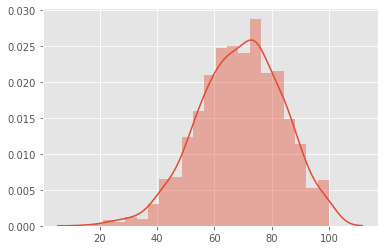

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(marks, hist=True)
plt.show()

We can see from the histogram of the marks that, although not perfectly, it looks like a normal distribution. We will try to find a Gaussian distribution to fit the data.

**Gaussian distribution** is a bell-shaped curve, and it is assumed that during any measurement values will follow a normal distribution with an equal number of measurements above and below the mean value.

---

Before proceeding any further, we need to find the mean and the standard deviation of the data.

Find the mean (```mu```) and standard deviation (```sigma```) of the ```marks``` array defined above.

In [ ]:
mu = sum(marks)/len(marks)
import statistics
sigma = statistics.stdev(marks)
print("Mean = "+str(mu)+", Standard Deviation = "+str(sigma))

Mean = 69.169, Standard Deviation = 14.600191937252216


##Z-score

A **z-score** describes the position of a raw score in terms of its distance from the mean, when measured in standard deviation units. The z-score is positive if the value lies above the mean, and negative if it lies below the mean.

$$Z = \frac{x - \mu}{\sigma}$$

where $\mu$ is the mean, and $\sigma$ is the standard deviation.

Essentially, the z-score tells us how many standard deviations away from the mean a data point is located.

Find the z-score of the maximum and minimum marks.

In [ ]:
max_mark = max(marks)
min_mark = min(marks)

z_score_max_mark = (max_mark-mu)/sigma
z_score_min_mark = (min_mark-mu)/sigma

print("Z-score of maximum mark = "+str(z_score_max_mark))
print("Z-score of minimum mark = "+str(z_score_min_mark))

Z-score of maximum mark = 2.1116845677442826
Z-score of minimum mark = -3.57317220377709


##Probability density function (PDF)

The PDF can tell us what the probability of the occurence of a data point is.

NOTE: *Formally, this is an incorrect definition. But this gives an almost good intuition of what the PDF is doing.*

A ```probability density function (PDF)```, or density of a continuous random variable, is a function whose value at any given sample (or point) in the sample space (the set of possible values taken by the random variable) can be interpreted as providing a relative likelihood that the value of the random variable would equal that sample. In other words, while the absolute likelihood for a continuous random variable to take on any particular value is $0$ (since there are an infinite set of possible values to begin with), the value of the PDF at two different samples can be used to infer how much more likely it is that the random variable would equal one sample compared to the other sample.

The formula to find PDF of some data point $x$ in a Gaussian distribution is given by -

$$f(x)={\frac{1}{{\sigma}\sqrt{2{\pi}}}e^{-{\frac{1}{2}}({\frac{x-\mu}{\sigma}})^2}}$$

---
In Python,

*   the value of ```pi``` can be obtained using ```math.pi```.
*   $e^x$ can be calculated using ```math.exp(x)```.

Implement the function below to calculate the PDF of a Gaussian distribution -

In [ ]:
def pdf(x,mu,sigma):
  import math
  f_x = math.exp(-0.5 * (((x - mu)/sigma)**2))/(sigma*math.sqrt(2*math.pi))
  return(f_x)

print("The probability of scoring 50 in the test is = "+str(pdf(50,mu,sigma)))

The probability of scoring 50 in the test is = 0.011540841469917903


#Conclusion

You now know -

*   How to figure out probability of an $x$ successes in $N$ trials using Binomial distribution.
*   The $z$-score of a data point
*   The probability of occurence of a data point using Gaussian distribution.